In [1]:
import io
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.neural_network import MLPClassifier
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen
    
memory = Memory(get_data_home())


@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']

X, y = fetch_mnist()
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 88770.19492622
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.112367
Test set score: 0.113500


<Figure size 640x480 with 16 Axes>

Iteration 1, loss = 88770.19492622
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Training loss did not improve more than tol=0.100000 for two consecutive epochs. Stopping.
Training set score: 0.112367
Test set score: 0.113500


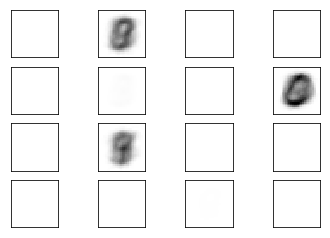

In [2]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-1, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 88770.19492622
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Training loss did not improve more than tol=1.000000 for two consecutive epochs. Stopping.
Training set score: 0.112367
Test set score: 0.113500


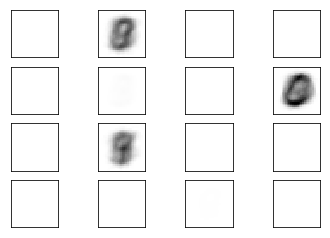

In [3]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()